In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs_rel_suboptim

In [3]:
fontsize = 14
entity_name = "sketchy-opts"
project_name1 = "linear_convergence_full_krr_v2"

In [4]:
x_axes = ["time", "datapasses", "iters"]
save_dir = "./plots/synthetic"
ylim = [1e-20, 1e1]

In [5]:
runs_inducing_krr = get_project_runs(entity_name, project_name1)

In [6]:
set_fontsize(fontsize)

# Render plots in LaTeX
render_in_latex()

In [7]:
hparams_to_label = {
    "askotch": ["r"],
    "skotch": ["r"],
    "pcg": ["precond"],
}
color_param = "r"

In [8]:
pcg_criteria = {
    "optimizer": lambda run: run.config["opt"] == "pcg",
    "precond": lambda run: run.config["precond_params"]["type"] == "nystrom",
    "r": lambda run: run.config["precond_params"]["r"] == 100, # this is ok in this particular experiment, since NystromPCG seems to give the same results across all tested ranks
}
bcd_criteria = {
    "optimizer": lambda run: run.config["opt"] in ["askotch", "skotch"],
}

In [9]:
pcg_run = filter_runs(runs_inducing_krr, pcg_criteria)
bcd_runs = filter_runs(runs_inducing_krr, bcd_criteria)

all_runs = pcg_run + bcd_runs

In [10]:
# Get final training loss from NystromPCG
pcg_train_loss = pcg_run[0].summary["train_loss"]

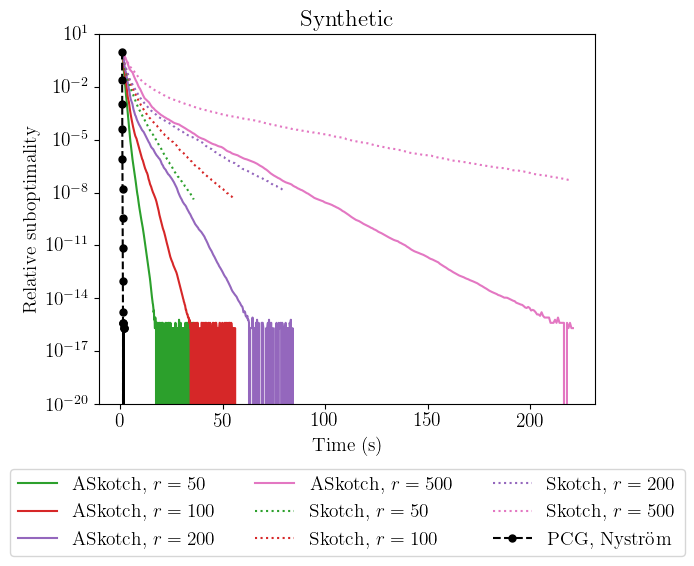

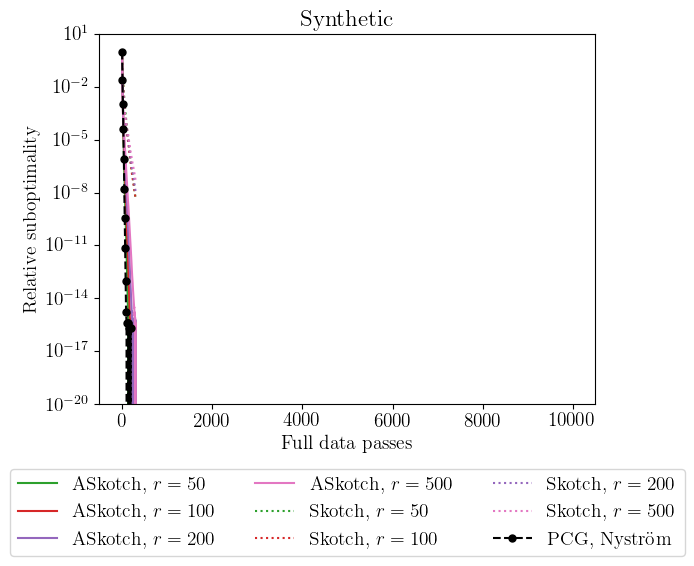

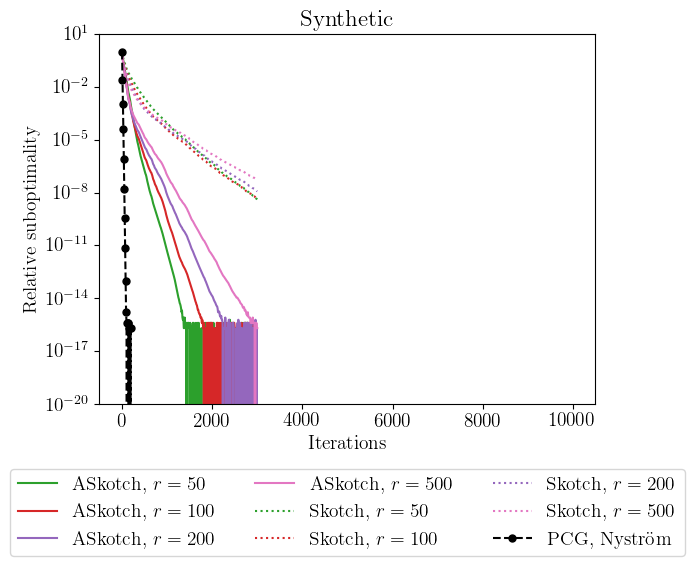

In [11]:
for x_axis in x_axes:
    plot_runs_rel_suboptim(all_runs, hparams_to_label, color_param, pcg_train_loss, 
                       x_axis, ylim, "Synthetic", save_dir, save_name="full_rel_subopt_vs_{x_axis}.pdf")